# Error Measurement of the `advection_fv4` Solver

We can test the `advection_fv4` solver by running the `smooth` test problem (a Gaussian profile) for one period (with $u = v = 1$) and comparing the final profile to the initial conditions.  Linear advection should not alter the shape, so any difference is the error in the method.

In [1]:
from pyro import Pyro

We'll run at several resolutions and keep track of the error for each

In [2]:
nzones = [16, 32, 64, 128, 256]
err = []

We need to bump up the number of steps in the simulation to ensure the higher resolution runs finish.

In [3]:
params_all = {"driver.cfl": 0.5, "driver.max_steps": 5000}

Now we'll loop over resolutions, setup the problem and store the initial conditions,
evolve, and the compute the error compared to the initial conditions.

In [4]:
for N in nzones:
    params = {"mesh.nx": N, "mesh.ny": N}
    p = Pyro("advection_fv4")
    p.initialize_problem(problem_name="smooth", inputs_dict=params|params_all)
    a_init = p.get_var("density").copy()
    p.run_sim()
    print(f"N = {N}, number of steps = {p.sim.n}")
    a = p.get_var("density")
    err.append((a - a_init).norm())

N = 16, number of steps = 64


N = 32, number of steps = 128


N = 64, number of steps = 256


N = 128, number of steps = 512


N = 256, number of steps = 1024


Here are the errors--we see that the error is decreasing by a factor of ~ 16 as we double
the number of zones, as expected for the 4th order method.

In [5]:
err

[np.float64(0.02732210851664811),
 np.float64(0.004572165056269441),
 np.float64(0.0003804503479700414),
 np.float64(2.425271389680081e-05),
 np.float64(1.5233260541432057e-06)]

Let's plot the convergence, along with a line indicating ideal 4th order convergence.

(10, 500)

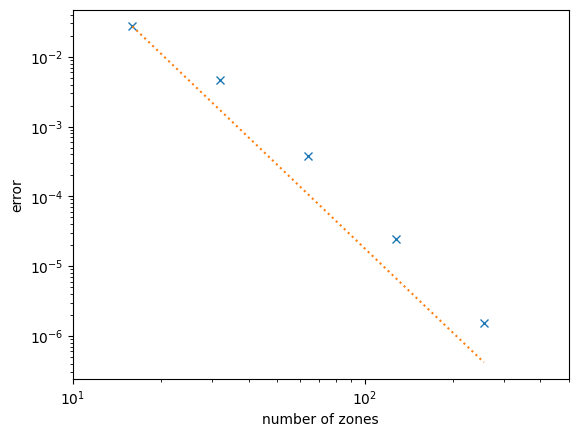

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.loglog(nzones, err, "x")
ax.loglog([nzones[0], nzones[-1]],
          [err[0], err[0] * (nzones[0] / nzones[-1])**4], ls=":")
ax.set_xlabel("number of zones")
ax.set_ylabel("error")
ax.set_xlim(10, 500)

At the lowest resolution, we are not really resolving the initial conditions well, so the convergence from 16 to 32 zones is not ideal.  The points at N > 32 follow the ideal scaling trend well.